In [145]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [146]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

 

In [148]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plantvillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1835 files belonging to 30 classes.


In [149]:
class_names = dataset.class_names
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [150]:
len(dataset)

58

In [151]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 1 26 29  0 22  2 16 13  7  6 14  4 13 20 27 17  4 28  6  5 24 10 12  8
  3 21 24 10 15 10  1 15]


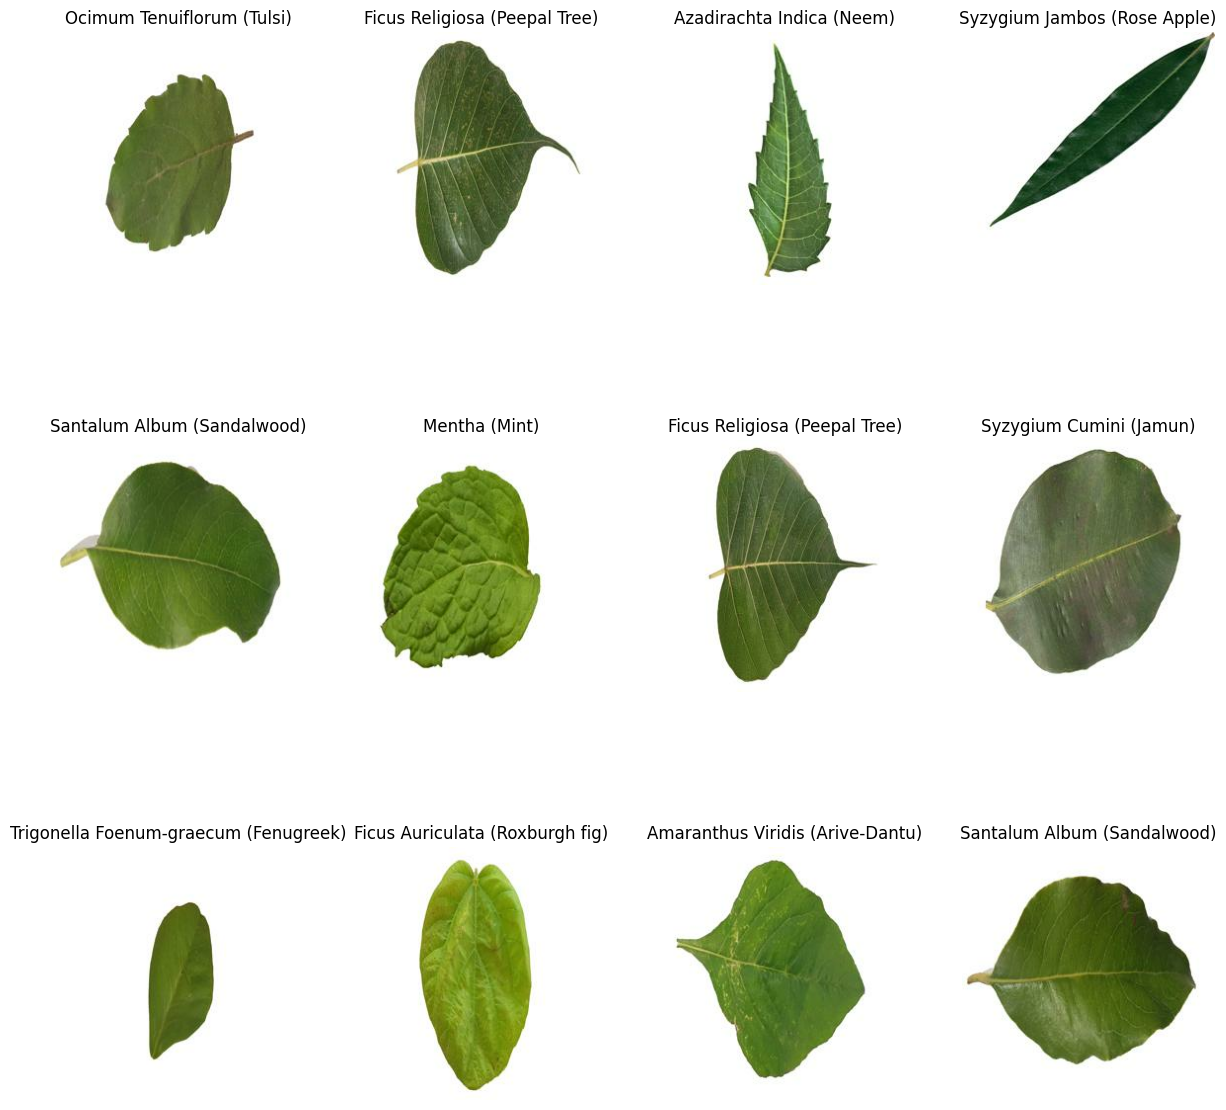

In [152]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [153]:
len(dataset)

58

In [154]:
# 80% ==> training
# 20% ==> 10% validation, 10% test


In [155]:
train_size = 0.8
len(dataset)*train_size

46.400000000000006

In [156]:
train_ds= dataset.take(46)
len(train_ds)

46

In [157]:
test_ds= dataset.skip(46)
len(test_ds)

12

In [158]:
val_size=0.1
len(dataset)*val_size


5.800000000000001

In [159]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [160]:
test_ds = test_ds.skip(5)
len(test_ds)

7

In [161]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [162]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [163]:
len(train_ds)

46

In [164]:
len(val_ds)

5

In [165]:
len(test_ds)

7

In [166]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [167]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [169]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=30
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Fixed typo here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Fixed typo here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # You can also specify the kernel_size this way
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)
    




In [170]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (32, 60, 60, 64)         

In [171]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [172]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    
    verbose=1,
    epochs=50,
)

Epoch 1/50
46/46 [==============================] - 27s 560ms/step - loss: 3.2697 - accuracy: 0.0820 - val_loss: 2.8437 - val_accuracy: 0.2000
Epoch 2/50
46/46 [==============================] - 25s 538ms/step - loss: 2.2864 - accuracy: 0.3349 - val_loss: 1.7605 - val_accuracy: 0.4812
Epoch 3/50
46/46 [==============================] - 25s 548ms/step - loss: 1.5708 - accuracy: 0.5417 - val_loss: 1.4503 - val_accuracy: 0.6000
Epoch 4/50
46/46 [==============================] - 25s 546ms/step - loss: 1.1847 - accuracy: 0.6313 - val_loss: 1.1362 - val_accuracy: 0.6687
Epoch 5/50
46/46 [==============================] - 25s 540ms/step - loss: 0.8860 - accuracy: 0.7298 - val_loss: 0.6943 - val_accuracy: 0.7937
Epoch 6/50
46/46 [==============================] - 25s 544ms/step - loss: 0.6882 - accuracy: 0.7781 - val_loss: 0.5677 - val_accuracy: 0.8500
Epoch 7/50
46/46 [==============================] - 26s 573ms/step - loss: 0.5736 - accuracy: 0.8119 - val_loss: 0.4541 - val_accuracy: 0.8500

In [173]:
scores = model.evaluate(test_ds)
scores


7/7 [==============================] - 1s 125ms/step - loss: 0.0844 - accuracy: 0.9732


[0.08439977467060089, 0.9732142686843872]

In [174]:
history

In [175]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 46}

In [176]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [177]:
 type(history.history['loss'])

list

In [178]:
len(history.history['loss'])

50

In [179]:
history.history['loss'][:5]

[3.2696621417999268,
 2.286430597305298,
 1.570797085762024,
 1.184705138206482,
 0.8859726190567017]

In [180]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

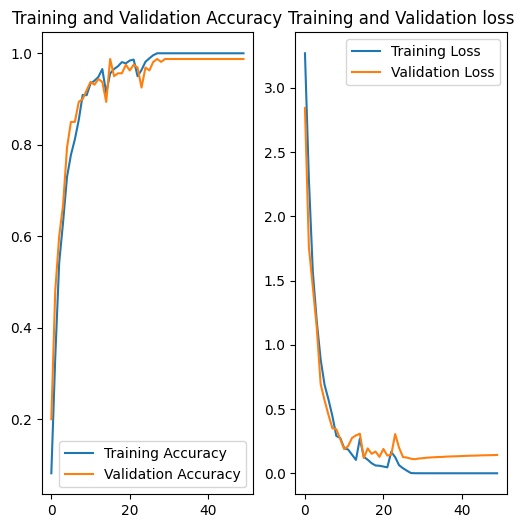

In [181]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()



First Image to predict
Actual Label Amaranthus Viridis (Arive-Dantu)
1/1 [==============================] - 0s 222ms/step
Predicted Label Amaranthus Viridis (Arive-Dantu)


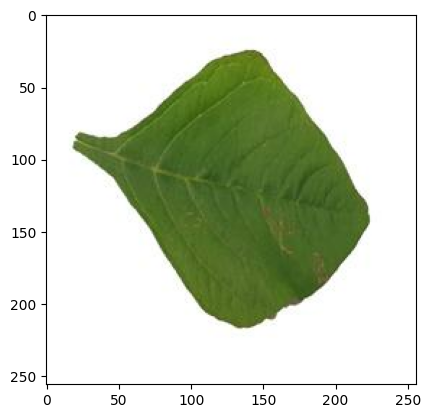

In [182]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("First Image to predict")
    plt.imshow(first_image)
    
    print("Actual Label",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("Predicted Label",class_names[np.argmax(batch_prediction[0])])
    

In [183]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 8ms/step


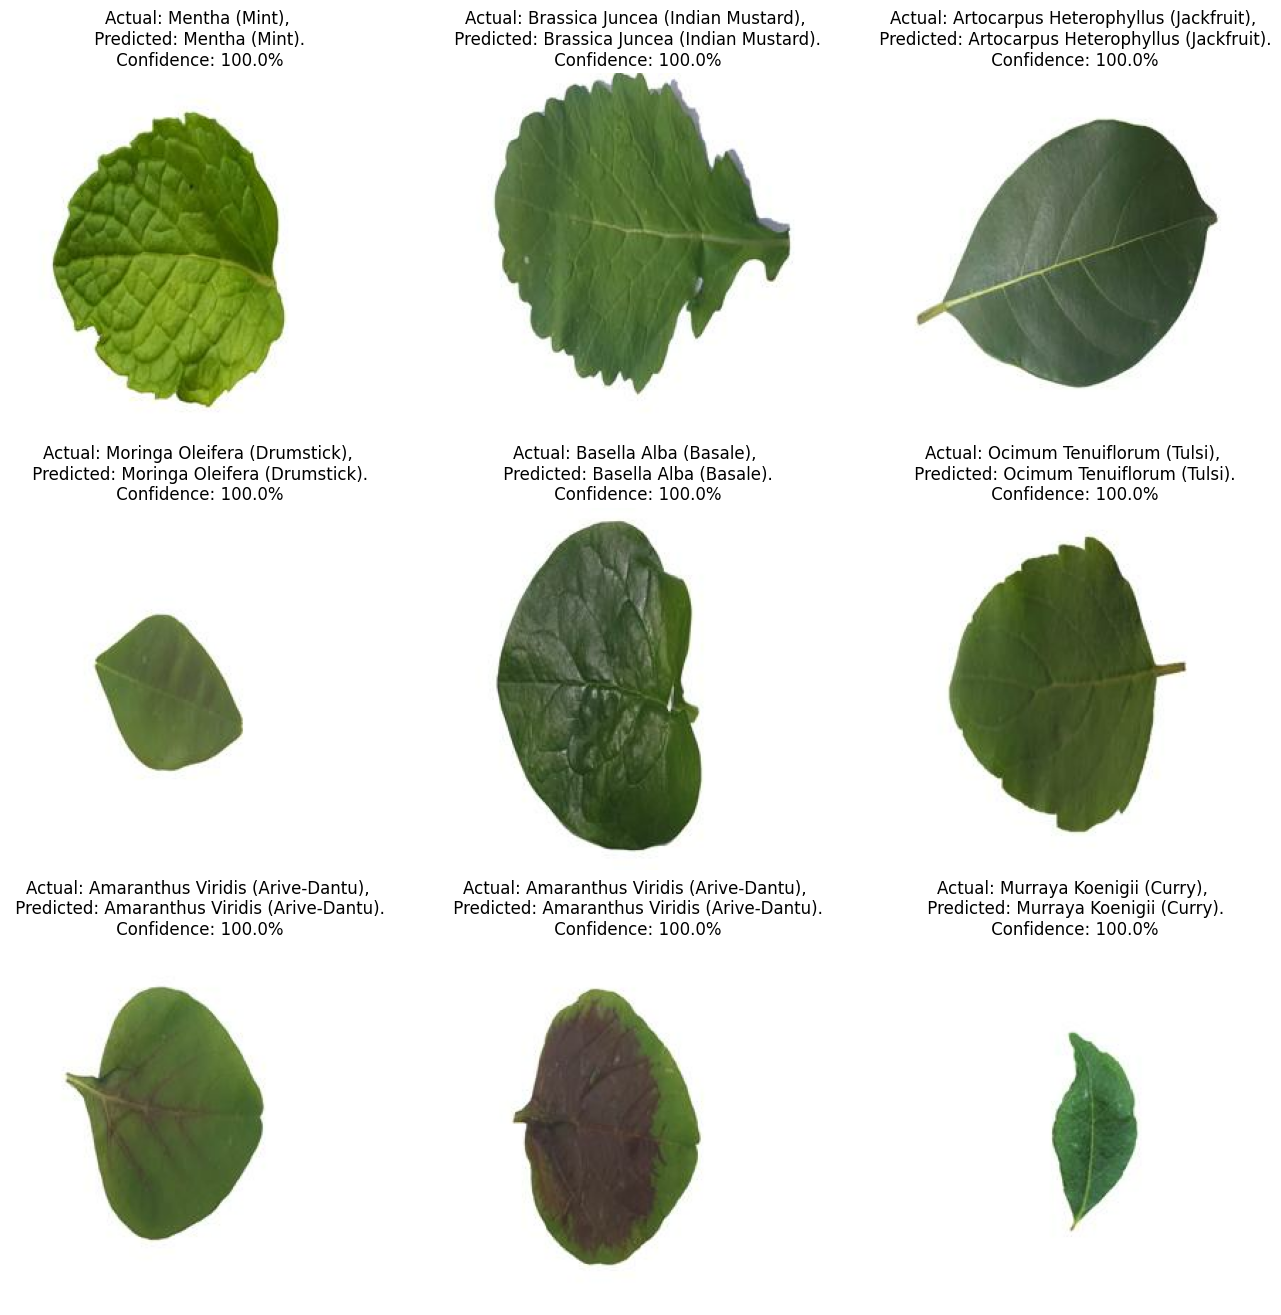

In [184]:
plt.figure(figsize=(16, 16))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [185]:
model_version=1
model.save(f"../finalmodel/{model_version}")

In [186]:
model.save("../finalmodels.h5")

C:\Users\harsh\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 230ms/step


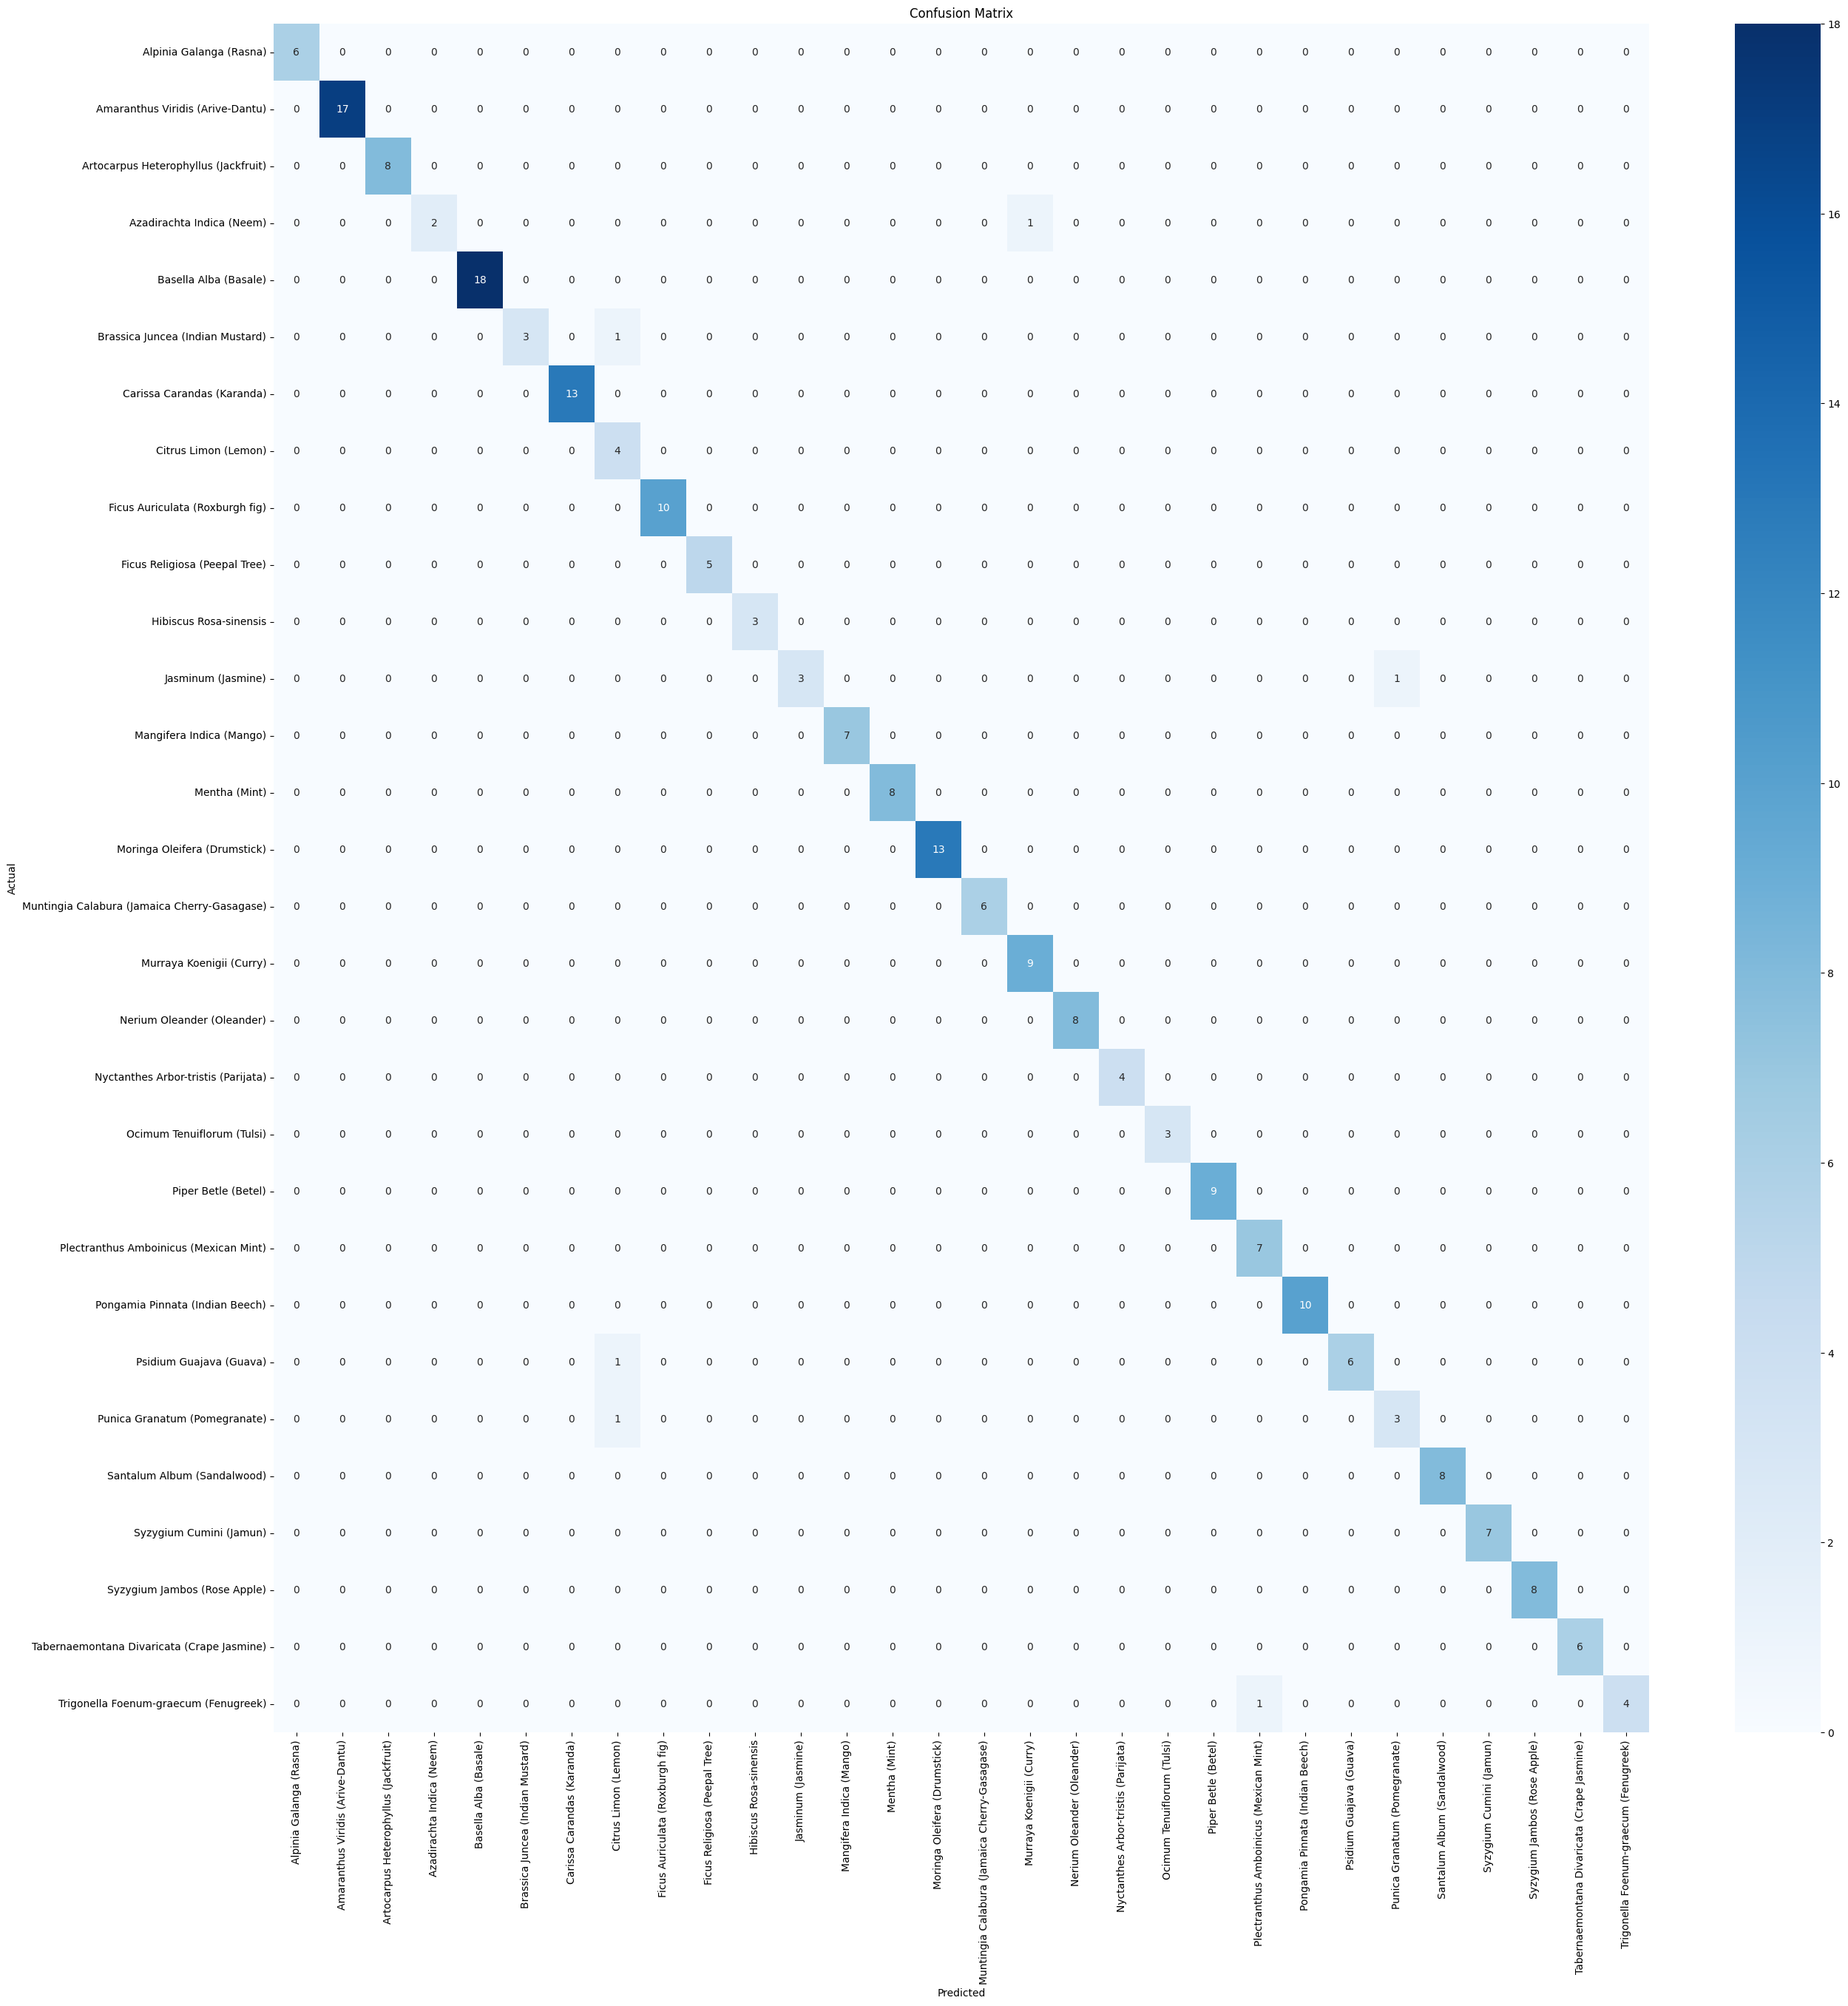

Classification Report:
                                              precision    recall  f1-score   support

                     Alpinia Galanga (Rasna)       1.00      1.00      1.00         6
            Amaranthus Viridis (Arive-Dantu)       1.00      1.00      1.00        17
        Artocarpus Heterophyllus (Jackfruit)       1.00      1.00      1.00         8
                   Azadirachta Indica (Neem)       1.00      0.67      0.80         3
                       Basella Alba (Basale)       1.00      1.00      1.00        18
            Brassica Juncea (Indian Mustard)       1.00      0.75      0.86         4
                  Carissa Carandas (Karanda)       1.00      1.00      1.00        13
                        Citrus Limon (Lemon)       0.57      1.00      0.73         4
             Ficus Auriculata (Roxburgh fig)       1.00      1.00      1.00        10
               Ficus Religiosa (Peepal Tree)       1.00      1.00      1.00         5
                      Hibiscus

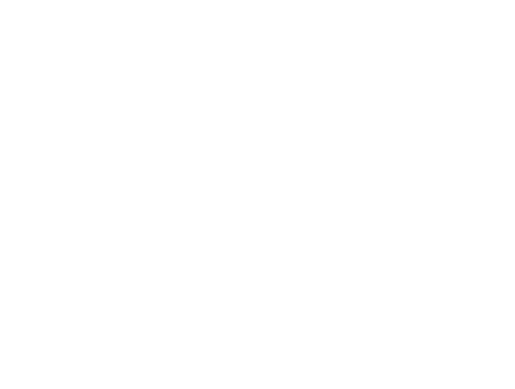

In [211]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code)

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the test dataset
for images_batch, labels_batch in test_ds:
    # Extend the true_labels list with the actual labels from the batch
    true_labels.extend(labels_batch.numpy())

    # Make predictions using the trained model on the batch
    predictions = model.predict(images_batch)

    # Get the predicted labels by taking the index of the maximum value in each prediction
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.axis("off")

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


In [209]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of class names (class_names) and the test_ds dataset
images_per_class = 10  # Adjust this based on your preference

# Get unique class labels from the dataset
class_labels = np.unique(class_names)

# Create an empty list to store balanced test data
balanced_test_data = []

# Iterate over class labels
for label in class_labels:
    # Filter images of a specific class
    class_images = [(image, label) for images_batch, labels_batch in test_ds if label == class_names[labels_batch[0]]]
    
    # Take a subset of images_per_class for each class
    class_images = class_images[:images_per_class]
    
    # Extend the balanced_test_data list with the balanced images
    balanced_test_data.extend(class_images)

# Extract images and labels separately
balanced_images, balanced_labels = zip(*balanced_test_data)

# Convert the lists to a TensorFlow dataset
balanced_test_ds = tf.data.Dataset.from_tensor_slices((balanced_images, balanced_labels))

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

for images_batch, labels_batch in balanced_test_ds:
    true_labels.extend(labels_batch.numpy())
    predictions = model.predict(images_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


NameError: name 'image' is not defined

In [210]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of class names (class_names) and the test_ds dataset
images_per_class = 10  # Adjust this based on your preference

# Get unique class labels from the dataset
class_labels = np.unique(class_names)

# Create an empty list to store balanced test data
balanced_test_data = []

# Iterate over class labels
for label in class_labels:
    # Filter images of a specific class
    class_images = [(image.numpy(), label) for image, label in test_ds.as_numpy_iterator() if class_names[label] == class_names[label]]
    
    # Take a subset of images_per_class for each class
    class_images = class_images[:images_per_class]
    
    # Extend the balanced_test_data list with the balanced images
    balanced_test_data.extend(class_images)

# Extract images and labels separately
balanced_images, balanced_labels = zip(*balanced_test_data)

# Convert the lists to a TensorFlow dataset
balanced_test_ds = tf.data.Dataset.from_tensor_slices((balanced_images, balanced_labels))

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

for images_batch, labels_batch in balanced_test_ds:
    true_labels.extend(labels_batch.numpy())
    predictions = model.predict(np.expand_dims(images_batch, axis=0))
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


TypeError: only integer scalar arrays can be converted to a scalar index

In [213]:
import tensorflow as tf

# Assuming you have a dataset named 'dataset' that contains your entire dataset

# Define the number of images you want for each class in the test set
images_per_class = 10  # Adjust this based on your preference

# Get unique class labels from the dataset
class_labels = np.unique(class_names)

# Create an empty list to store balanced test data
balanced_test_data = []

# Iterate over each class label
for label in class_labels:
    # Filter the dataset to get images only for the current class
    class_images = dataset.filter(lambda x, y: y == label)
    
    # Take a fixed number of images_per_class for each class
    class_images = class_images.take(images_per_class)
    
    # Extend the balanced_test_data list with the sampled images
    balanced_test_data.extend(class_images)

# Concatenate the balanced_test_data to create the final balanced test dataset
balanced_test_dataset = tf.data.Dataset.from_tensor_slices(balanced_test_data)

# Shuffle the final test dataset
balanced_test_dataset = balanced_test_dataset.shuffle(buffer_size=len(balanced_test_data))

# (Optional) Batch and preprocess the dataset as needed
balanced_test_dataset = balanced_test_dataset.batch(batch_size)
balanced_test_dataset = balanced_test_dataset.map(preprocess_function)

# Now you can use balanced_test_dataset for evaluation


TypeError: in user code:

    File "C:\Users\harsh\AppData\Local\Temp\ipykernel_9092\35655782.py", line 17, in None  *
        lambda x, y: y == label

    TypeError: Input 'y' of 'Equal' Op has type string that does not match type int32 of argument 'x'.


1/1 [==============================] - 0s 201ms/step


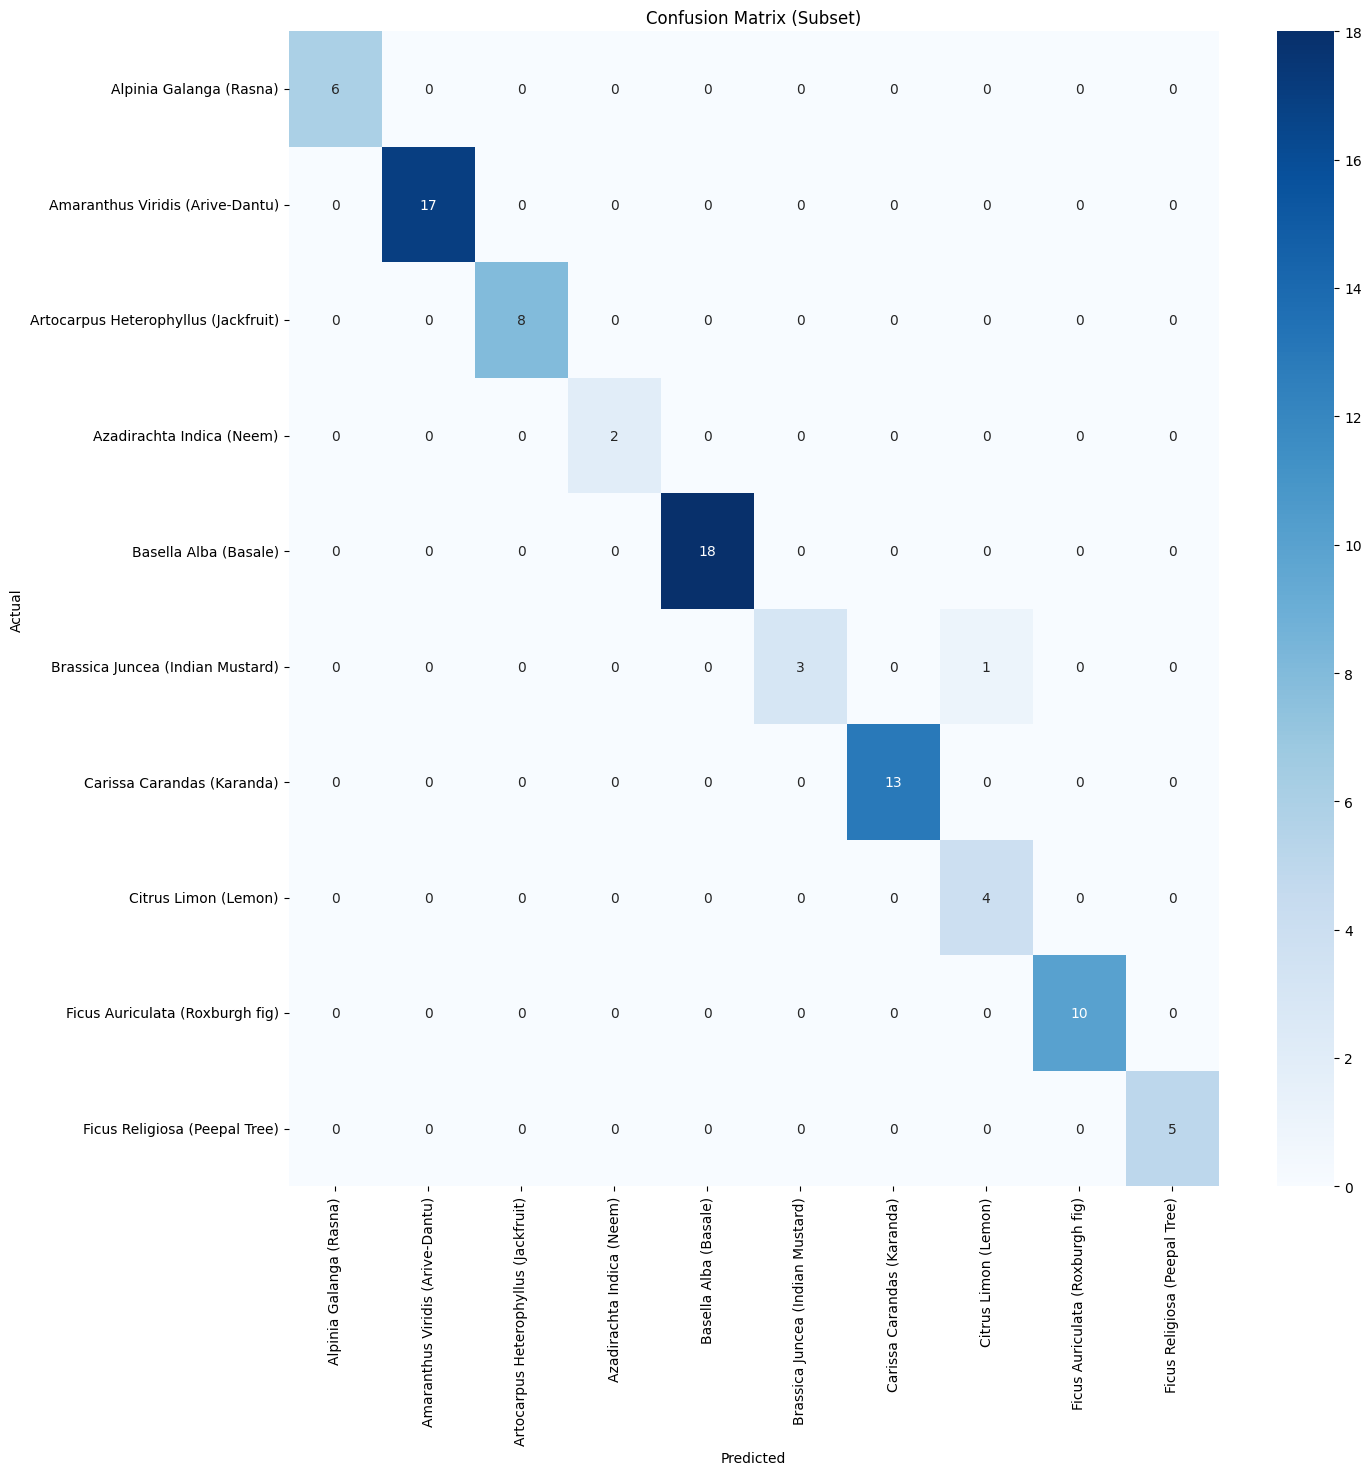

Classification Report:
                                              precision    recall  f1-score   support

                     Alpinia Galanga (Rasna)       1.00      1.00      1.00         6
            Amaranthus Viridis (Arive-Dantu)       1.00      1.00      1.00        17
        Artocarpus Heterophyllus (Jackfruit)       1.00      1.00      1.00         8
                   Azadirachta Indica (Neem)       1.00      0.67      0.80         3
                       Basella Alba (Basale)       1.00      1.00      1.00        18
            Brassica Juncea (Indian Mustard)       1.00      0.75      0.86         4
                  Carissa Carandas (Karanda)       1.00      1.00      1.00        13
                        Citrus Limon (Lemon)       0.57      1.00      0.73         4
             Ficus Auriculata (Roxburgh fig)       1.00      1.00      1.00        10
               Ficus Religiosa (Peepal Tree)       1.00      1.00      1.00         5
                      Hibiscus

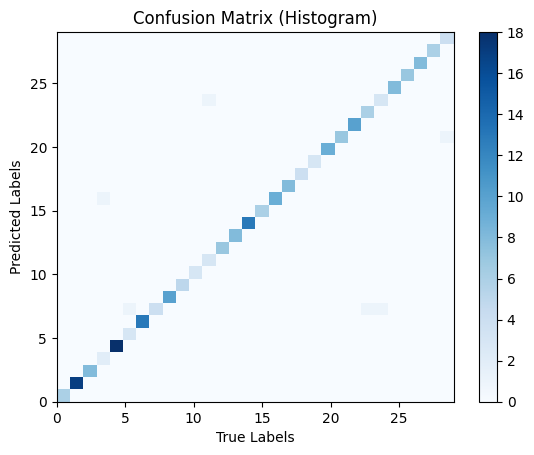

In [214]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code)

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the test dataset
for images_batch, labels_batch in test_ds:
    # Extend the true_labels list with the actual labels from the batch
    true_labels.extend(labels_batch.numpy())

    # Make predictions using the trained model on the batch
    predictions = model.predict(images_batch)

    # Get the predicted labels by taking the index of the maximum value in each prediction
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Choose the number of classes to visualize
num_classes_to_visualize = 10  # Adjust this based on your preference

# Get a subset of class names and confusion matrix
subset_class_names = class_names[:num_classes_to_visualize]
subset_cm = cm[:num_classes_to_visualize, :num_classes_to_visualize]

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(15, 15))
sns.heatmap(subset_cm, annot=True, fmt='d', cmap='Blues', xticklabels=subset_class_names, yticklabels=subset_class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Subset)')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Plot a histogram of true labels and predicted labels
plt.hist2d(true_labels, predicted_labels, bins=(len(class_names), len(class_names)), cmap=plt.cm.Blues)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.colorbar()
plt.title('Confusion Matrix (Histogram)')
plt.show()


In [215]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of class names (class_names) and the test_ds dataset
images_per_class = 10  # Adjust this based on your preference

# Get unique class labels from the dataset
class_labels = np.unique(class_names)

# Create an empty list to store balanced test data
balanced_test_data = []

# Iterate over class labels
for label in class_labels:
    # Filter images of a specific class
    class_images = [(image.numpy(), label) for image, label in test_ds.as_numpy_iterator() if label == class_names[np.where(class_names == label)[0][0]]]
    
    # Take a subset of images_per_class for each class
    class_images = class_images[:images_per_class]
    
    # Extend the balanced_test_data list with the balanced images
    balanced_test_data.extend(class_images)

# Extract images and labels separately
balanced_images, balanced_labels = zip(*balanced_test_data)

# Convert the lists to a TensorFlow dataset
balanced_test_ds = tf.data.Dataset.from_tensor_slices((balanced_images, balanced_labels))

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the balanced test dataset
for images_batch, labels_batch in balanced_test_ds:
    true_labels.extend(labels_batch.numpy())
    predictions = model.predict(np.expand_dims(images_batch, axis=0))
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


C:\Users\harsh\AppData\Local\Temp\ipykernel_9092\2859212583.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  class_images = [(image.numpy(), label) for image, label in test_ds.as_numpy_iterator() if label == class_names[np.where(class_names == label)[0][0]]]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [216]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of class names (class_names) and the test_ds dataset
images_per_class = 10  # Adjust this based on your preference

# Get unique class labels from the dataset
class_labels = np.unique(class_names)

# Create an empty list to store balanced test data
balanced_test_data = []

# Iterate over class labels
for label in class_labels:
    # Filter images of a specific class
    class_images = [(image.numpy(), label) for image, label in test_ds.as_numpy_iterator() if np.array_equal(label, class_names[np.where(class_names == label)[0][0]])]
    
    # Take a subset of images_per_class for each class
    class_images = class_images[:images_per_class]
    
    # Extend the balanced_test_data list with the balanced images
    balanced_test_data.extend(class_images)

# Extract images and labels separately
balanced_images, balanced_labels = zip(*balanced_test_data)

# Convert the lists to a TensorFlow dataset
balanced_test_ds = tf.data.Dataset.from_tensor_slices((balanced_images, balanced_labels))

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the balanced test dataset
for images_batch, labels_batch in balanced_test_ds:
    true_labels.extend(labels_batch.numpy())
    predictions = model.predict(np.expand_dims(images_batch, axis=0))
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


C:\Users\harsh\AppData\Local\Temp\ipykernel_9092\2078875147.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  class_images = [(image.numpy(), label) for image, label in test_ds.as_numpy_iterator() if np.array_equal(label, class_names[np.where(class_names == label)[0][0]])]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [217]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of class names (class_names) and the test_ds dataset
images_per_class = 10  # Adjust this based on your preference

# Get unique class labels from the dataset
class_labels = np.unique(class_names)

# Create an empty list to store balanced test data
balanced_test_data = []

# Iterate over class labels
for label in class_labels:
    # Convert label to string
    str_label = str(label)
    
    # Filter images of a specific class
    class_images = [(image.numpy(), label) for image, label in test_ds.as_numpy_iterator() if str(label) == class_names[np.where(class_names == str_label)[0][0]]]
    
    # Take a subset of images_per_class for each class
    class_images = class_images[:images_per_class]
    
    # Extend the balanced_test_data list with the balanced images
    balanced_test_data.extend(class_images)

# Extract images and labels separately
balanced_images, balanced_labels = zip(*balanced_test_data)

# Convert the lists to a TensorFlow dataset
balanced_test_ds = tf.data.Dataset.from_tensor_slices((balanced_images, balanced_labels))

# Assuming you have a list of true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the balanced test dataset
for images_batch, labels_batch in balanced_test_ds:
    true_labels.extend(labels_batch.numpy())
    predictions = model.predict(np.expand_dims(images_batch, axis=0))
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

IndexError: index 0 is out of bounds for axis 0 with size 0